## Data Science and Business Analytics Intern At The Sparks Foundation

## Task - Prediction Using Decision Tree Algorithm

## Name - Sneha Bulbule

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

In [2]:
df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
dir(df)

['Id',
 'PetalLengthCm',
 'PetalWidthCm',
 'SepalLengthCm',
 'SepalWidthCm',
 'Species',
 'T',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_TO_AXIS_NUMBER',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 

In [4]:
df.shape

(150, 6)

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [8]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## LabelEncoding

In [9]:
df['flower_name'] = df['Species']

In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.Species = le.fit_transform(df.Species)
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,flower_name
145,146,6.7,3.0,5.2,2.3,2,Iris-virginica
146,147,6.3,2.5,5.0,1.9,2,Iris-virginica
147,148,6.5,3.0,5.2,2.0,2,Iris-virginica
148,149,6.2,3.4,5.4,2.3,2,Iris-virginica
149,150,5.9,3.0,5.1,1.8,2,Iris-virginica


In [11]:
df[df.Species==1].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,flower_name
50,51,7.0,3.2,4.7,1.4,1,Iris-versicolor
51,52,6.4,3.2,4.5,1.5,1,Iris-versicolor
52,53,6.9,3.1,4.9,1.5,1,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,1,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,1,Iris-versicolor


In [12]:
df.tail(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,flower_name
145,146,6.7,3.0,5.2,2.3,2,Iris-virginica
146,147,6.3,2.5,5.0,1.9,2,Iris-virginica
147,148,6.5,3.0,5.2,2.0,2,Iris-virginica
148,149,6.2,3.4,5.4,2.3,2,Iris-virginica
149,150,5.9,3.0,5.1,1.8,2,Iris-virginica


## Data Visualization

In [13]:
df0 = df[df.Species==0]
df1 = df[df.Species==1]
df2 = df[df.Species==2]
df2.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,flower_name
100,101,6.3,3.3,6.0,2.5,2,Iris-virginica
101,102,5.8,2.7,5.1,1.9,2,Iris-virginica
102,103,7.1,3.0,5.9,2.1,2,Iris-virginica
103,104,6.3,2.9,5.6,1.8,2,Iris-virginica
104,105,6.5,3.0,5.8,2.2,2,Iris-virginica


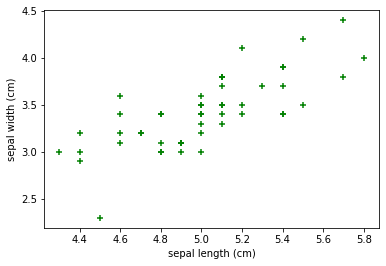

In [14]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['SepalLengthCm'],df0['SepalWidthCm'],color='green',marker='+')

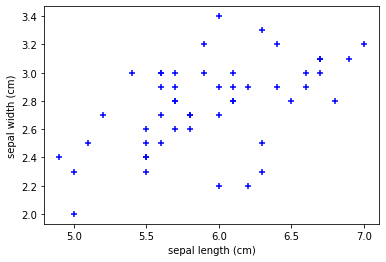

In [15]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df1['SepalLengthCm'],df1['SepalWidthCm'],color='blue',marker='+')

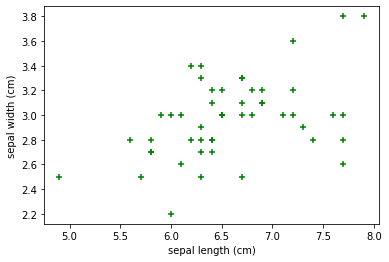

In [16]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df2['SepalLengthCm'],df2['SepalWidthCm'],color='green',marker='+')

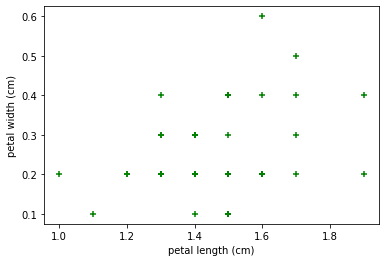

In [17]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['PetalLengthCm'],df0['PetalWidthCm'],color='green',marker='+')

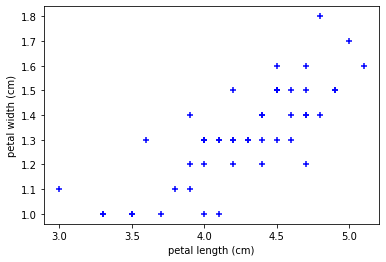

In [18]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='blue',marker='+')

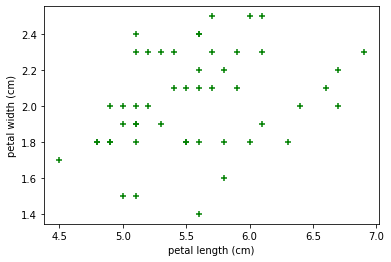

In [19]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color='green',marker='+')

<AxesSubplot:>

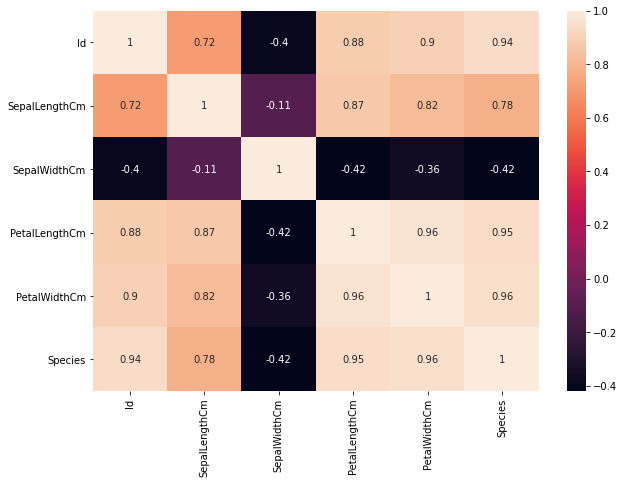

In [20]:
plt.figure(figsize=(10,7))
x = df.corr()
sns.heatmap(x,annot=True)

In [21]:
x = df.drop(['Id','Species','flower_name'],axis = 'columns')
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [22]:
y = df.Species
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

## Training The Model

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [24]:
len(x_train)

120

In [25]:
len(x_test)

30

In [26]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [27]:
model.score(x_test,y_test)

0.9666666666666667

In [28]:
x_test[:10]

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
83,6.0,2.7,5.1,1.6
147,6.5,3.0,5.2,2.0
81,5.5,2.4,3.7,1.0
145,6.7,3.0,5.2,2.3
55,5.7,2.8,4.5,1.3
73,6.1,2.8,4.7,1.2
43,5.0,3.5,1.6,0.6
14,5.8,4.0,1.2,0.2
31,5.4,3.4,1.5,0.4
59,5.2,2.7,3.9,1.4


In [29]:
y_predicted = model.predict(x_test)

## Performance Evaluation Using Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predicted)
cm

array([[11,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'Truth')

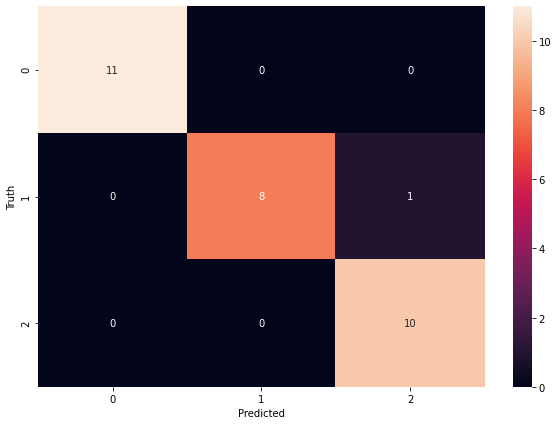

In [31]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Testing The Model

In [32]:
model.predict([[7.0,3.2,4.7,1.4]])

array([1])

In [33]:
model.predict([[5.8,2.7,5.1,1.9]])

array([2])

In [34]:
model.predict([[3.6,2.6,1.6,4.8]])

array([0])